**LEVEL_2 - TASK_1**

**PREDICTING HPUSE PRICES WITH LINEAR REGRESSION**

IMPORTING LIBRARIES

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("Housing.csv")

In [74]:
print("Dataset Shape:", df.shape)

Dataset Shape: (545, 13)


In [75]:
print("Data Types:\n", df.dtypes)

Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [76]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


HANDLING MISSING VALUES

In [77]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [78]:
df.fillna({col: df[col].median() for col in num_cols}, inplace=True)

In [79]:
df.fillna({col: df[col].mode()[0] for col in cat_cols}, inplace=True)

OUTLIER DETECTION

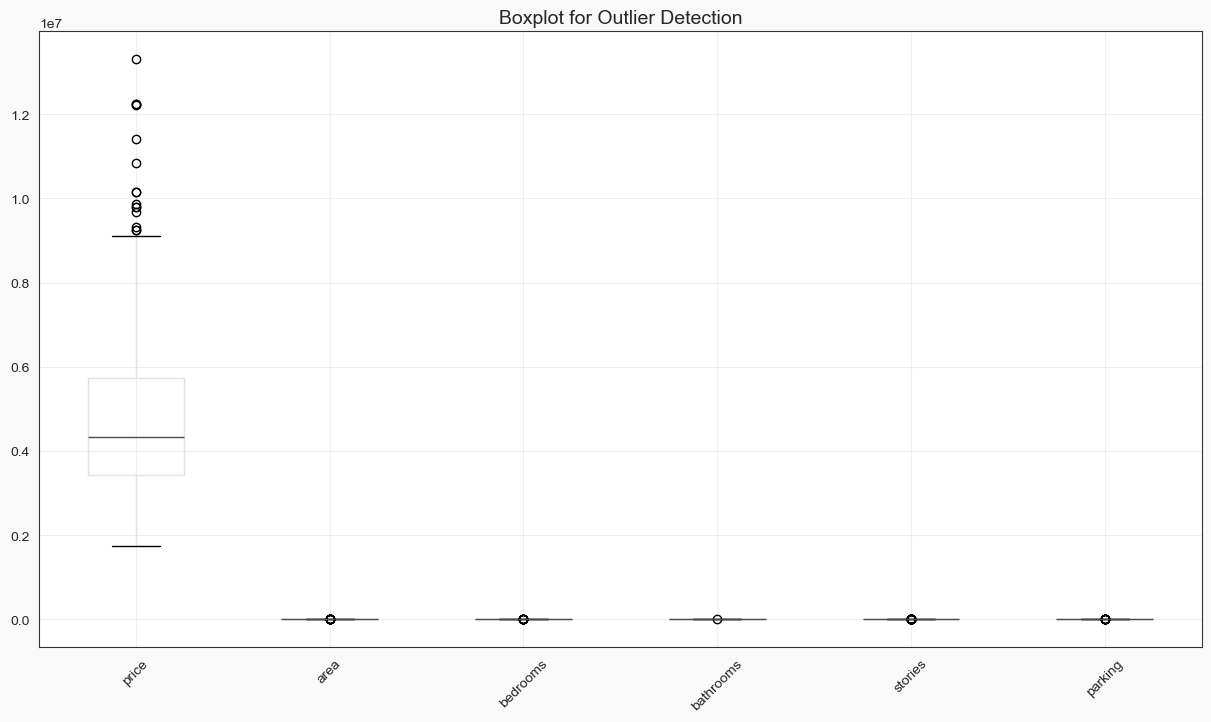

In [80]:
plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

HANDLING OUTLIER USING IQR

In [81]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [82]:
print("New dataset shape after outlier removal:", df.shape)

New dataset shape after outlier removal: (365, 13)


UNIVARIATE ANALYSIS

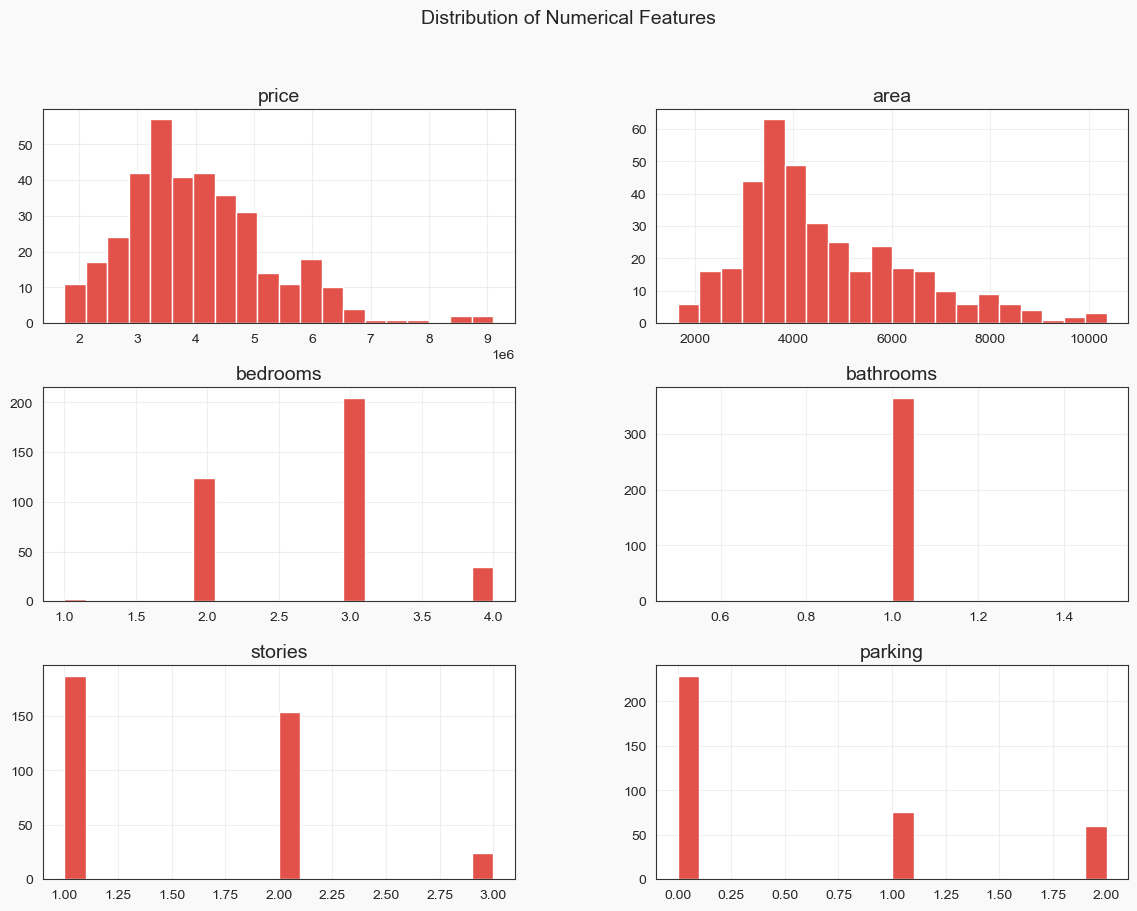

In [83]:
df[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

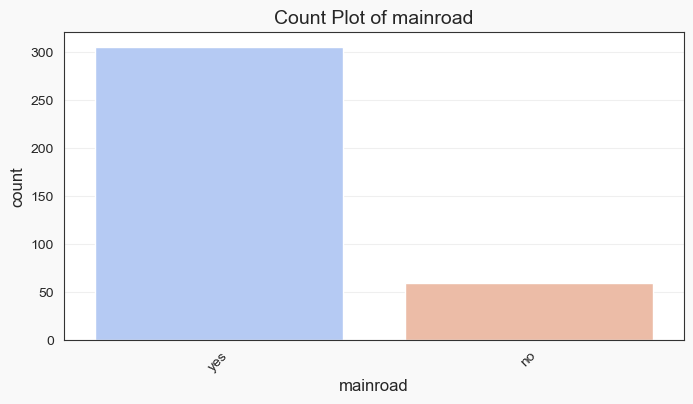

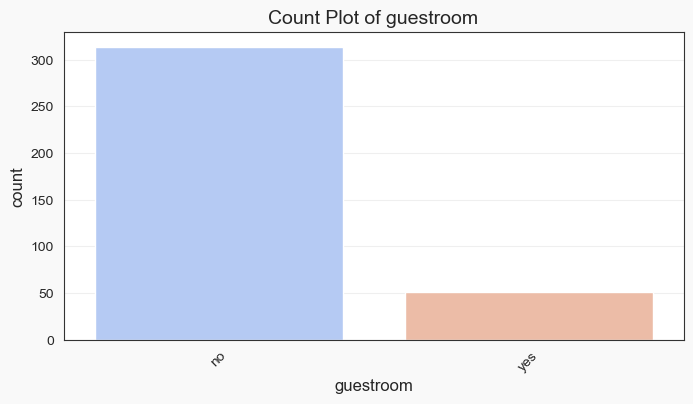

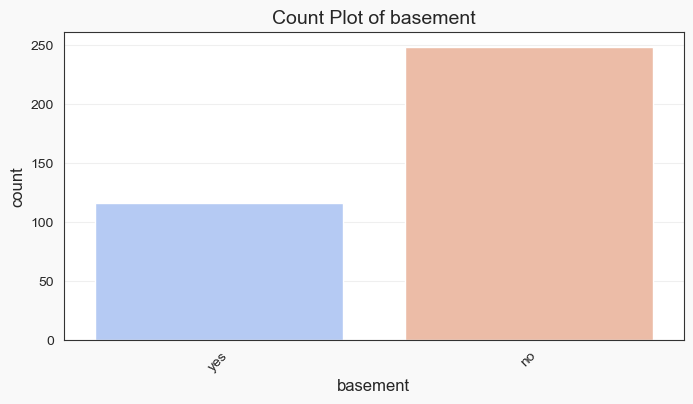

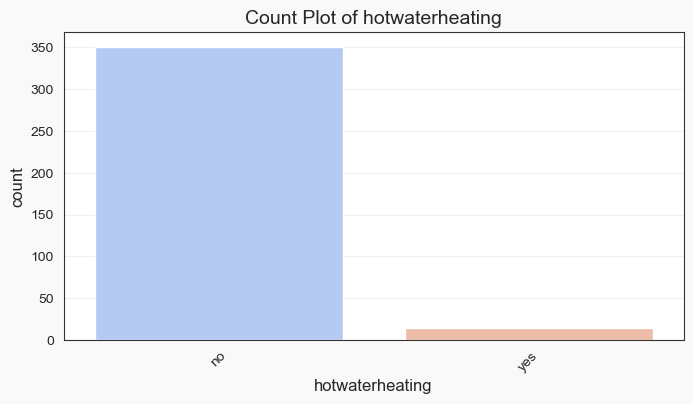

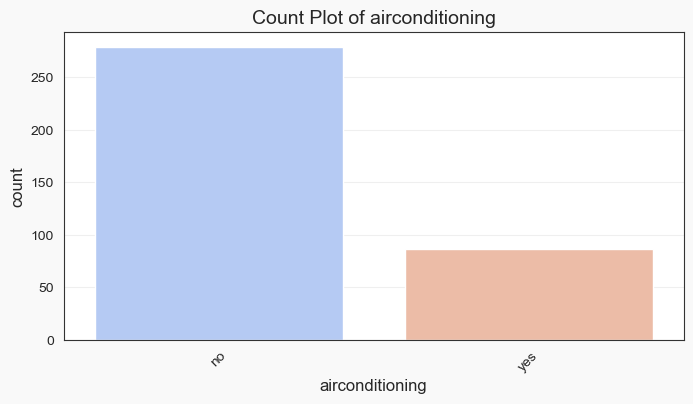

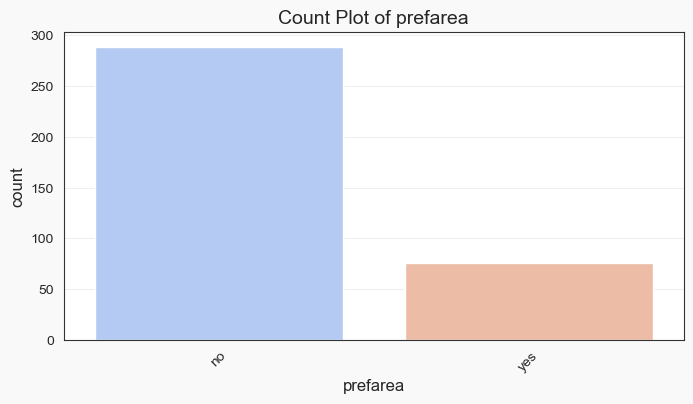

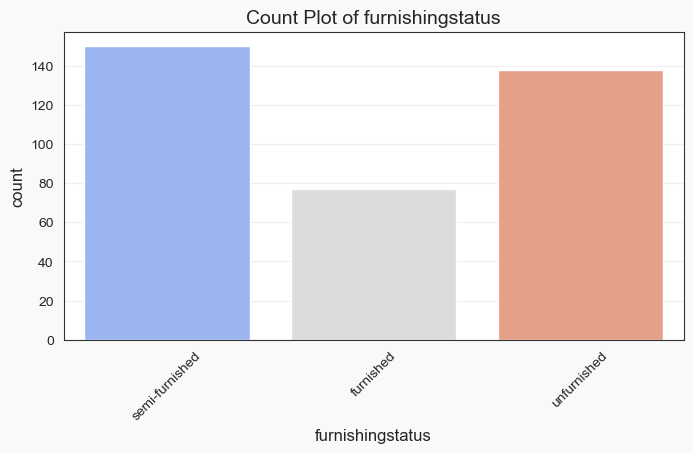

In [84]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue=col, palette="coolwarm", legend=False)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

BIVARIATE ANALYSIS

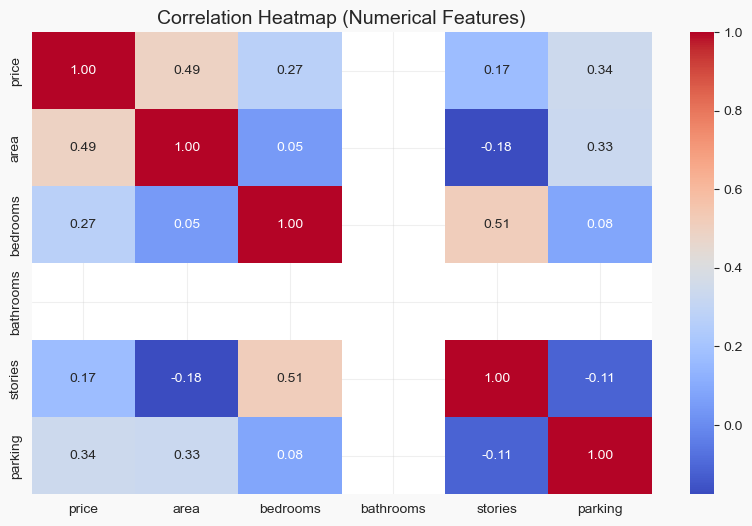

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [86]:
if 'price' in df.columns:
    target_col = 'price'
else:
    target_col = [col for col in df.columns if 'price' in col.lower()][0]
print(f"Target variable selected: {target_col}")

Target variable selected: price


Target variable selected: price


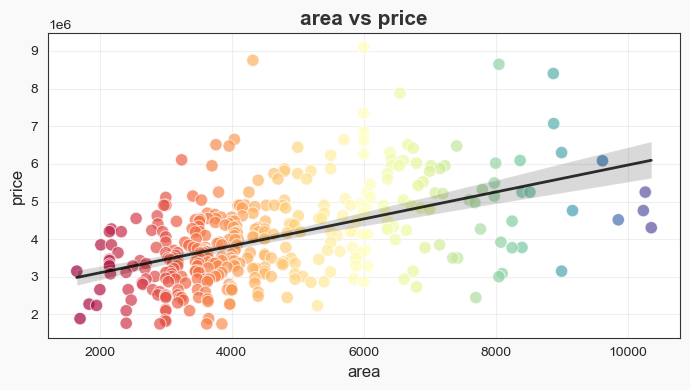

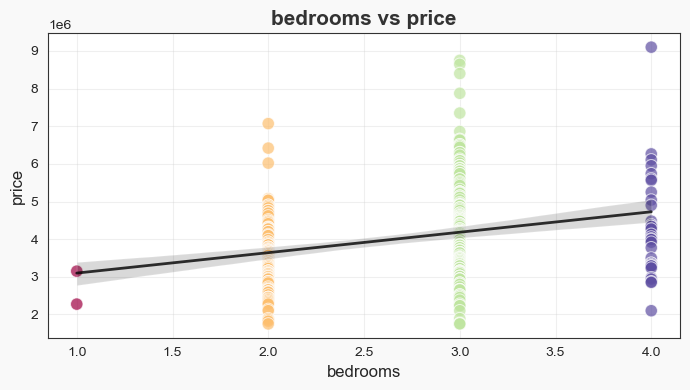

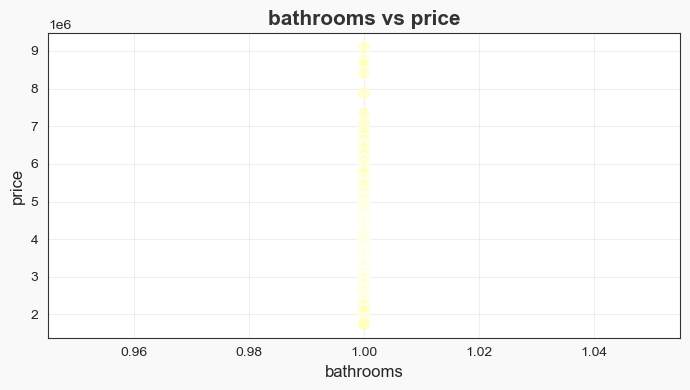

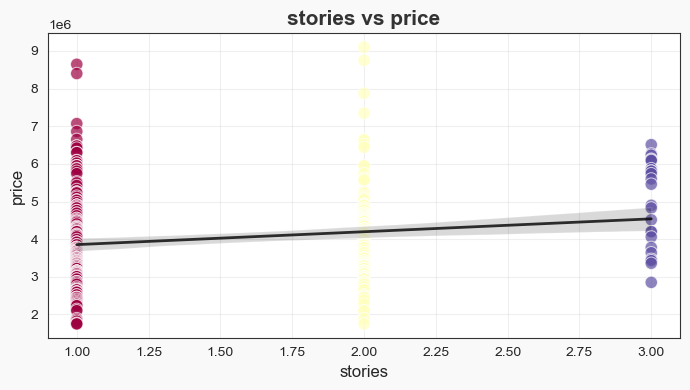

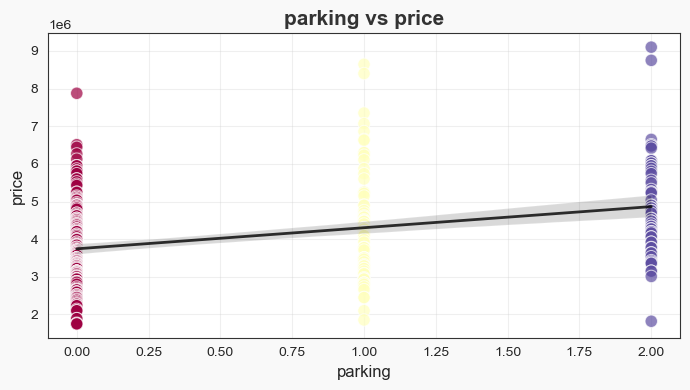

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Spectral")  
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "grid.alpha": 0.3,
    "figure.facecolor": "#F9F9F9"
})
print(f"Target variable selected: {target_col}")
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(7, 4))
        sns.scatterplot(
            data=df, 
            x=col, 
            y=target_col, 
            hue=col,         
            palette="Spectral", 
            alpha=0.7, 
            edgecolor="white", 
            s=80
        )
        sns.regplot(
            data=df,
            x=col,
            y=target_col,
            scatter=False,
            color="black",
            line_kws={"lw": 2, "alpha": 0.8}
        )
        plt.title(f"{col} vs {target_col}", fontsize=15, fontweight='bold', color="#333333")
        plt.xlabel(col, fontsize=12)
        plt.ylabel(target_col, fontsize=12)
        plt.legend([],[], frameon=False)  
        plt.tight_layout()
        plt.show()

In [88]:
df.to_csv("Housing_Cleaned.csv", index=False)
print("✅ Data Cleaning & EDA Complete!")
print("Cleaned dataset saved as 'Housing_Cleaned.csv'.")

✅ Data Cleaning & EDA Complete!
Cleaned dataset saved as 'Housing_Cleaned.csv'.


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor

In [90]:
df = pd.read_csv("Housing_Cleaned.csv")

In [91]:
print("✅ Cleaned dataset loaded successfully!")
print("Shape:", df.shape)

✅ Cleaned dataset loaded successfully!
Shape: (365, 13)


In [92]:
print(df.head(5))

     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  9100000  6000         4          1        2      yes        no      yes   
1  8750000  4320         3          1        2      yes        no      yes   
2  8645000  8050         3          1        1      yes       yes      yes   
3  8400000  8875         3          1        1      yes        no       no   
4  7875000  6550         3          1        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no              no        2       no   semi-furnished  
1             yes              no        2       no   semi-furnished  
2              no             yes        1       no        furnished  
3              no              no        1       no   semi-furnished  
4              no             yes        0      yes        furnished  


In [93]:
if 'price' in df.columns:
    target_col = 'price'
else:
    target_col = [col for col in df.columns if 'price' in col.lower()][0]
print(f"\n🎯 Target variable selected: {target_col}\n")


🎯 Target variable selected: price



FEATURES AND TARGET

In [94]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [95]:
cat_cols = X.select_dtypes(exclude=np.number).columns
num_cols = X.select_dtypes(include=np.number).columns

In [96]:
encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

CORRELATION ANALYSIS

In [97]:
corr = pd.concat([X[num_cols], y], axis=1).corr()[target_col].drop(target_col)
corr = corr.sort_values(ascending=False)

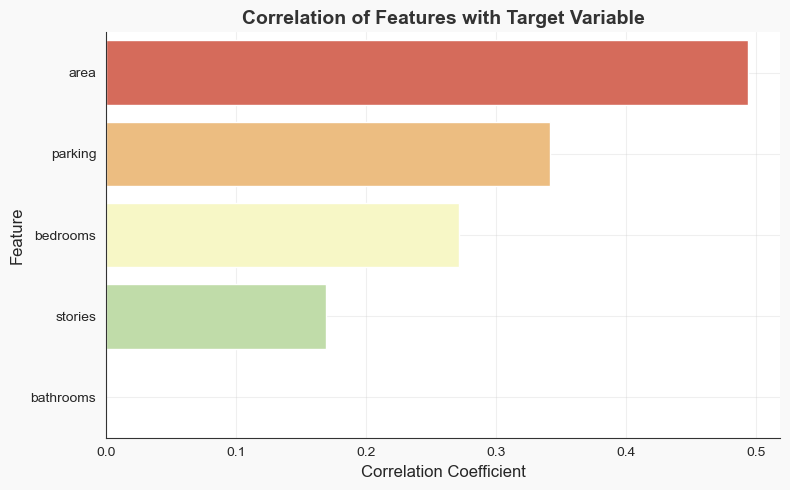

In [98]:
corr_df = pd.DataFrame({
    "Feature": corr.index,
    "Correlation": corr.values
})
plt.figure(figsize=(8, 5))
sns.barplot(data=corr_df, x="Correlation", y="Feature", hue="Feature", palette="Spectral", legend=False)
plt.title("Correlation of Features with Target Variable", fontsize=14, fontweight='bold', color="#333333")
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [99]:
print("Top correlated features with target:\n")
print(corr.head(10))

Top correlated features with target:

area         0.494096
parking      0.342046
bedrooms     0.271667
stories      0.169148
bathrooms         NaN
Name: price, dtype: float64


STATISTICAL ANALYSIS

In [100]:
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
f_scores = pd.DataFrame({
    "Feature": X.columns,
    "F_Score": selector.scores_,
    "p_Value": selector.pvalues_
}).sort_values(by="F_Score", ascending=False)

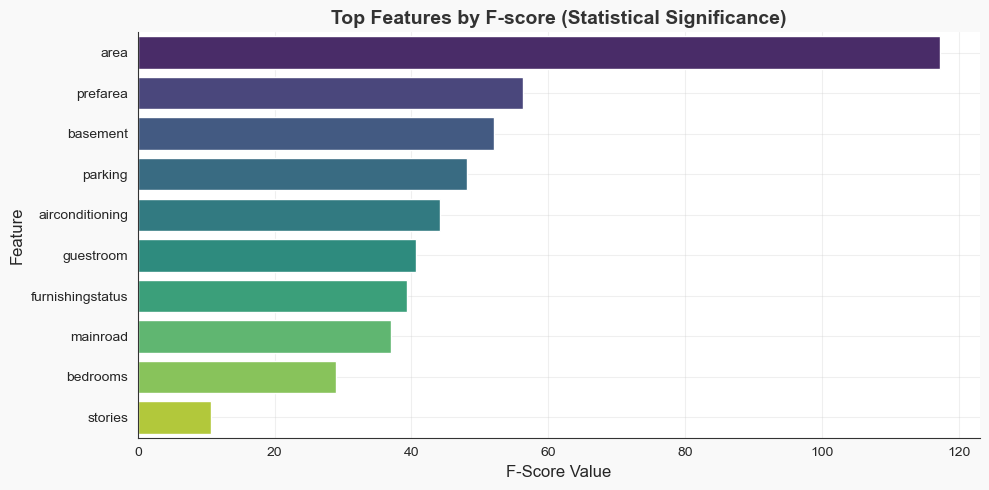

In [101]:
top_f = f_scores.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_f,
    x="F_Score",
    y="Feature",
    hue="Feature",
    palette="viridis",
    legend=False
)
plt.title("Top Features by F-score (Statistical Significance)", fontsize=14, fontweight='bold', color="#333333")
plt.xlabel("F-Score Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

MODEL BASED FEATURE

In [102]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

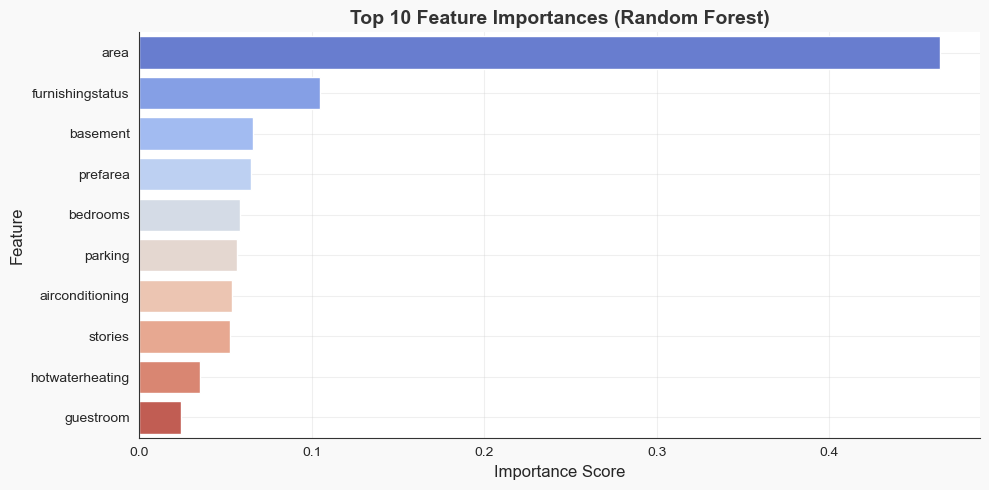

In [103]:
top_importances = importances.head(10).reset_index()
top_importances.columns = ["Feature", "Importance"]

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_importances,
    x="Importance",
    y="Feature",
    hue="Feature",
    palette="coolwarm",
    legend=False
)
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14, fontweight='bold', color="#333333")
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [104]:
print("Top 10 features by Random Forest importance:")
print(importances.head(10))

Top 10 features by Random Forest importance:
area                0.464267
furnishingstatus    0.104473
basement            0.065638
prefarea            0.064972
bedrooms            0.058358
parking             0.056370
airconditioning     0.053610
stories             0.052473
hotwaterheating     0.034932
guestroom           0.024379
dtype: float64


FEATURE SCALING

In [105]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [106]:
X_scaled[target_col] = y
X_scaled.to_csv("Housing_Prepared.csv", index=False)
print("\n✅ Feature selection & preprocessing complete!")
print("Processed dataset saved as: 'Housing_Prepared.csv'")


✅ Feature selection & preprocessing complete!
Processed dataset saved as: 'Housing_Prepared.csv'


**MODEL TRAINING AND EVALUATION**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [108]:
df = pd.read_csv("Housing_Prepared.csv")

In [109]:
print("✅ Processed dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head(3))

✅ Processed dataset loaded successfully!
Shape: (365, 13)
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  0.799475  2.017626        0.0  0.725729  0.439102  -0.403014  1.465112   
1 -0.176494  0.413196        0.0  0.725729  0.439102  -0.403014  1.465112   
2  1.990389  0.413196        0.0 -0.899369  0.439102   2.481303  1.465112   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  \
0        -0.199715        -0.555197  1.925353 -0.512812         -0.223107   
1         5.007138        -0.555197  1.925353 -0.512812         -0.223107   
2        -0.199715         1.801162  0.609335 -0.512812         -1.558089   

     price  
0  9100000  
1  8750000  
2  8645000  


IDENTIFY TARGET VARIABLE

In [110]:
X = df.drop(columns=[target_col])
y = df[target_col]

TRAIN-TEST SPLIT

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (292, 12), Test set: (73, 12)


LINEAR REGRESSION

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [113]:
print("\n✅ Model training complete!")
print("Intercept:", model.intercept_)
print("Coefficients shape:", model.coef_.shape)


✅ Model training complete!
Intercept: 4019971.9015776934
Coefficients shape: (12,)


MODEL EVALUATION

In [114]:
y_pred = model.predict(X_test)

In [115]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [116]:
print("📊 MODEL PERFORMANCE METRICS:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

📊 MODEL PERFORMANCE METRICS:
Mean Squared Error (MSE): 1125105522384.828
Root Mean Squared Error (RMSE): 1060709.914
Mean Absolute Error (MAE): 729315.764
R² Score: 0.473


VISUALIZATIONS

In [117]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "grid.alpha": 0.3,
    "figure.facecolor": "#F9F9F9"
})

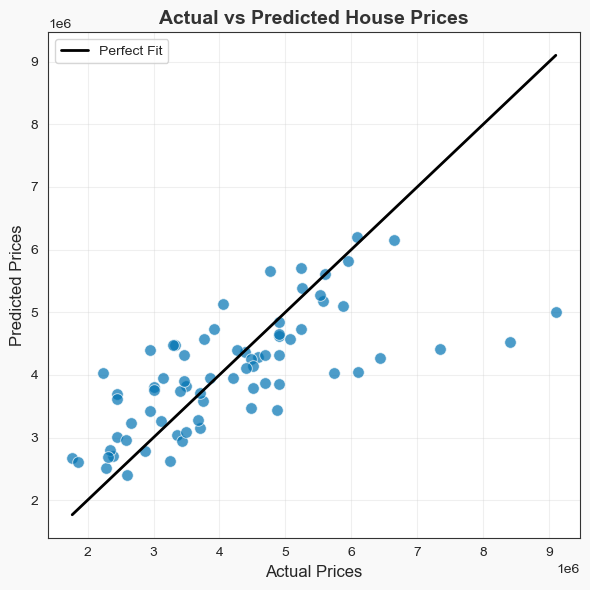

In [118]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color="#0072B2", s=70, alpha=0.7, edgecolor="white")
sns.lineplot(x=y_test, y=y_test, color="black", label="Perfect Fit", lw=2)
plt.title("Actual vs Predicted House Prices", fontweight="bold", color="#333333")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.tight_layout()
plt.show()

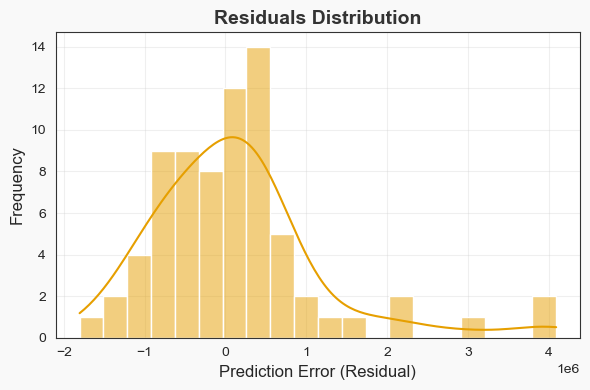

In [119]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color="#E69F00", bins=20)
plt.title("Residuals Distribution", fontweight="bold", color="#333333")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [120]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

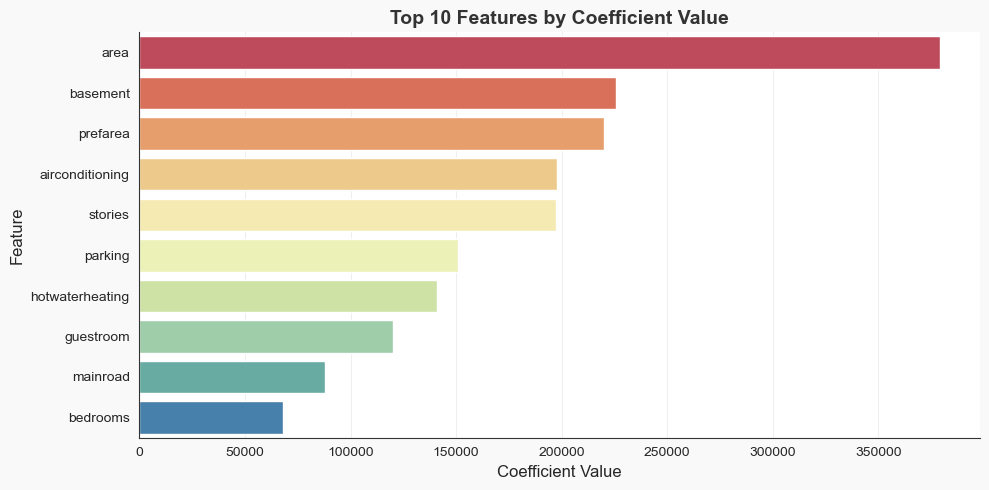

In [121]:
plt.figure(figsize=(10, 5))
sns.barplot(data=coeff_df.head(10), x="Coefficient", y="Feature", hue="Feature", palette="Spectral", legend=False)
plt.title("Top 10 Features by Coefficient Value", fontsize=14, fontweight='bold', color="#333333")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
sns.despine()
plt.tight_layout()
plt.show()

In [122]:
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Residual": residuals
})
pred_df.to_csv("Model_Predictions.csv", index=False)
print("Predictions saved as 'Model_Predictions.csv'.")

Predictions saved as 'Model_Predictions.csv'.


**MODEL EVALUATION**

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pred_df = pd.read_csv("Model_Predictions.csv")

COMPUTE METRICS

In [124]:
mse = mean_squared_error(pred_df["Actual"], pred_df["Predicted"])
rmse = np.sqrt(mse)
mae = mean_absolute_error(pred_df["Actual"], pred_df["Predicted"])
r2 = r2_score(pred_df["Actual"], pred_df["Predicted"])

In [125]:
print("📊 MODEL PERFORMANCE METRICS")
print("-" * 40)
print(f"Mean Absolute Error (MAE):      {mae:.3f}")
print(f"Mean Squared Error (MSE):       {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²):                 {r2:.3f}")

📊 MODEL PERFORMANCE METRICS
----------------------------------------
Mean Absolute Error (MAE):      729315.764
Mean Squared Error (MSE):       1125105522384.828
Root Mean Squared Error (RMSE): 1060709.914
R-squared (R²):                 0.473


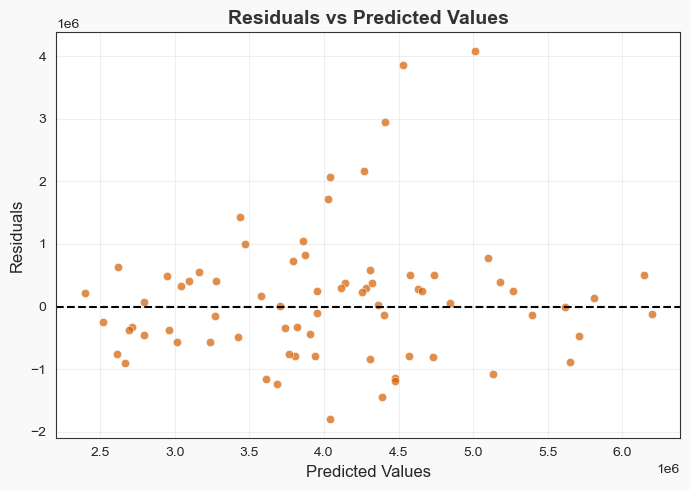

In [126]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=pred_df["Predicted"], y=pred_df["Residual"], color="#D55E00", alpha=0.7, edgecolor="white")
plt.axhline(0, color="black", linestyle="--", lw=1.5)
plt.title("Residuals vs Predicted Values", fontweight="bold", color="#333333")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

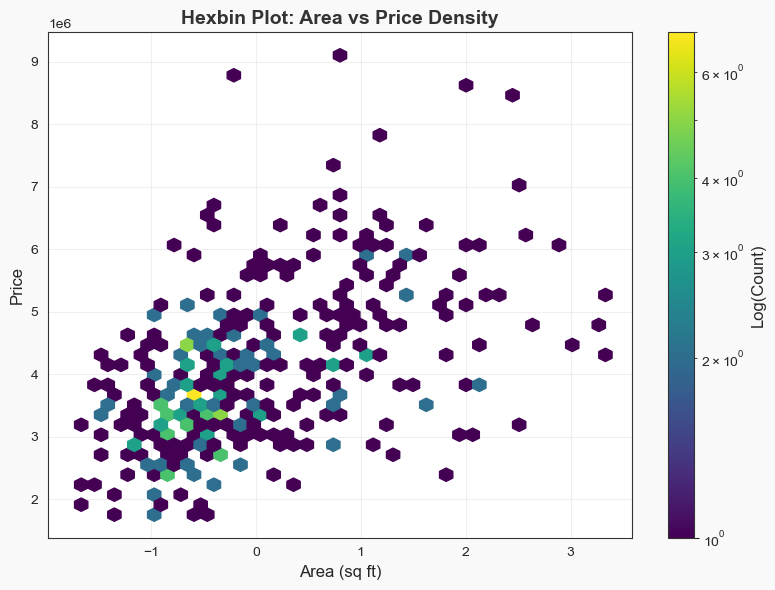

In [127]:
plt.figure(figsize=(8,6))
plt.hexbin(df['area'], df['price'], gridsize=40, cmap='viridis', bins='log')
plt.colorbar(label='Log(Count)')
plt.title('Hexbin Plot: Area vs Price Density', fontweight='bold', color='#333333')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [128]:
pip install joypy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [129]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [130]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

In [131]:
df['area_category'] = pd.qcut(df['area'], q=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])

<Figure size 1000x600 with 0 Axes>

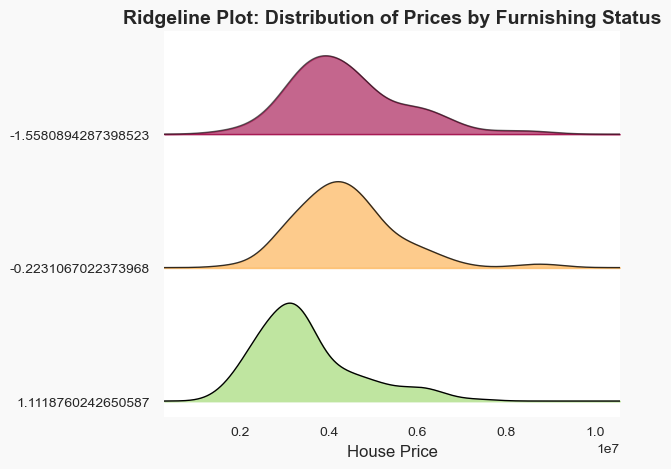

In [132]:
from joypy import joyplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
joyplot(
    data=df,
    by='furnishingstatus',   
    column='price',
    colormap=plt.cm.Spectral,
    fade=True,
    linewidth=1
)
plt.title('Ridgeline Plot: Distribution of Prices by Furnishing Status', fontsize=14, fontweight='bold')
plt.xlabel('House Price')
plt.tight_layout()
plt.show()

In [133]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


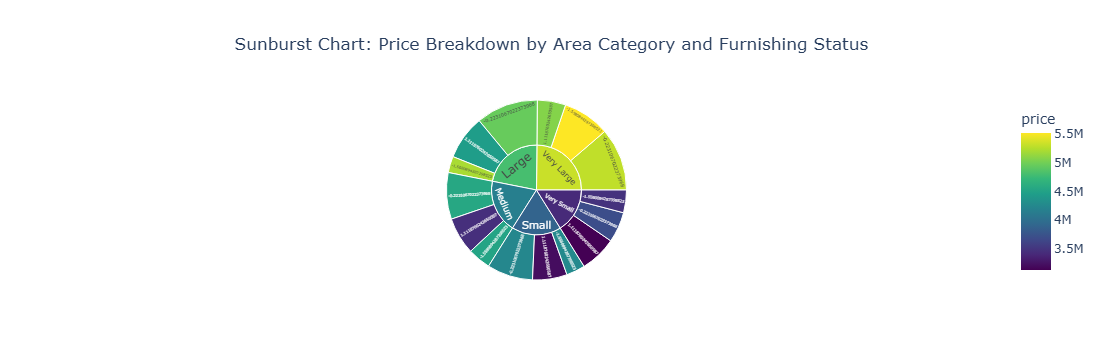

In [134]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['area_category', 'furnishingstatus'],  # existing columns
    values='price',
    color='price',
    color_continuous_scale='Viridis',
    title='Sunburst Chart: Price Breakdown by Area Category and Furnishing Status'
)
fig.update_layout(title_x=0.5)
fig.show()

In [135]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


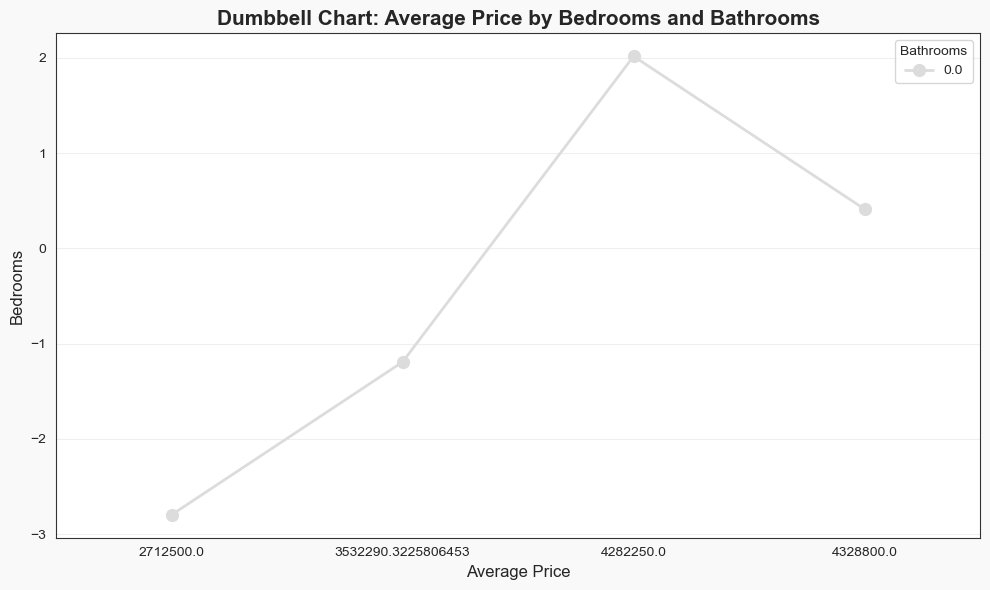

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
avg_prices = df.groupby(['bedrooms', 'bathrooms'])['price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.pointplot(
    x='price', y='bedrooms', hue='bathrooms', data=avg_prices,
    palette='coolwarm', markers=["o", "D", "s"],  
    linewidth=2, markersize=8                      
)
plt.title('Dumbbell Chart: Average Price by Bedrooms and Bathrooms', fontsize=15, fontweight='bold')
plt.xlabel('Average Price')
plt.ylabel('Bedrooms')
plt.legend(title='Bathrooms', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

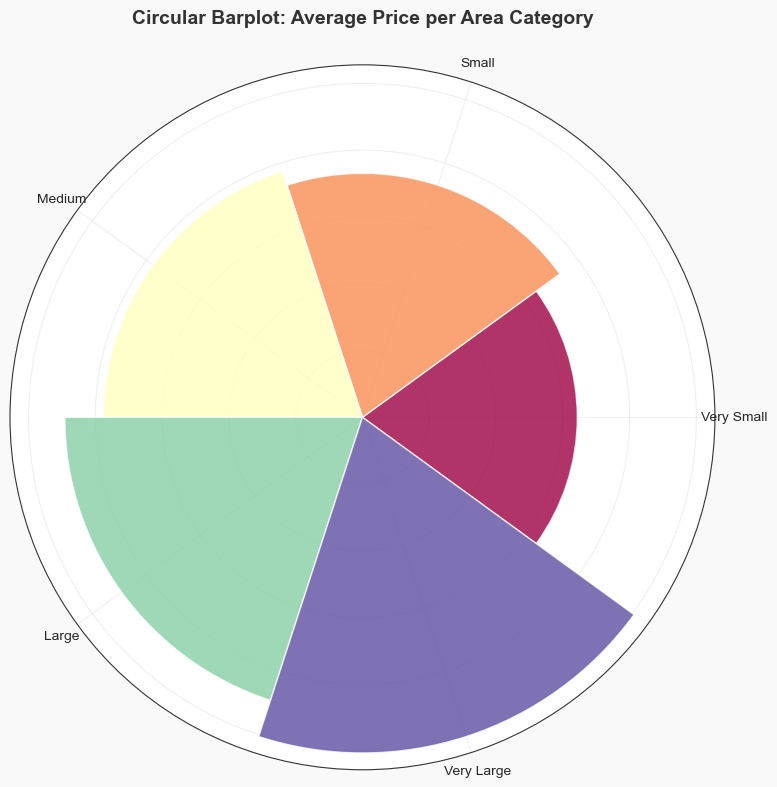

In [137]:
import numpy as np
import matplotlib.pyplot as plt
cat_avg = df.groupby('area_category')['price'].mean().reset_index()  # use existing column
cat_avg = cat_avg.sort_values('price', ascending=True)

N = len(cat_avg)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = cat_avg['price']
width = (2*np.pi) / N

fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': 'polar'})
bars = ax.bar(theta, radii, width=width, bottom=0, color=plt.cm.Spectral(np.linspace(0,1,N)), alpha=0.8)

ax.set_xticks(theta)
ax.set_xticklabels(cat_avg['area_category'], fontsize=10) 
ax.set_yticklabels([])
ax.set_title("Circular Barplot: Average Price per Area Category", fontweight="bold", color="#333333", pad=30)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

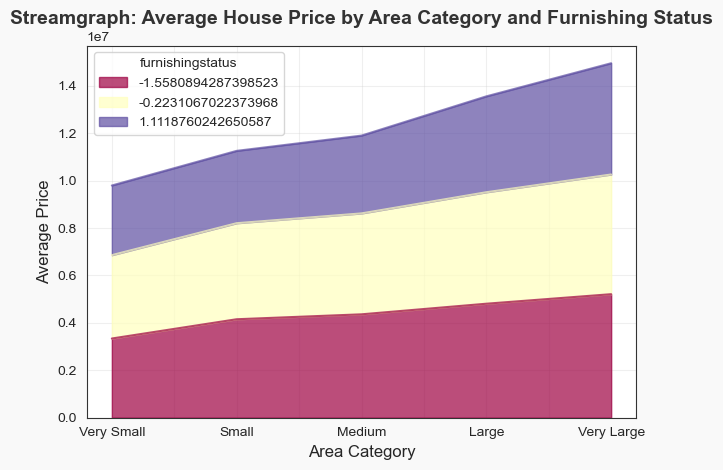

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
avg_price = df.groupby(['area_category', 'furnishingstatus'])['price'].mean().reset_index()

avg_price_pivot = avg_price.pivot(index='area_category', columns='furnishingstatus', values='price')

plt.figure(figsize=(10,6))
avg_price_pivot.plot.area(alpha=0.7, colormap='Spectral')
plt.title('Streamgraph: Average House Price by Area Category and Furnishing Status', fontweight='bold', color='#333333')
plt.xlabel('Area Category')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

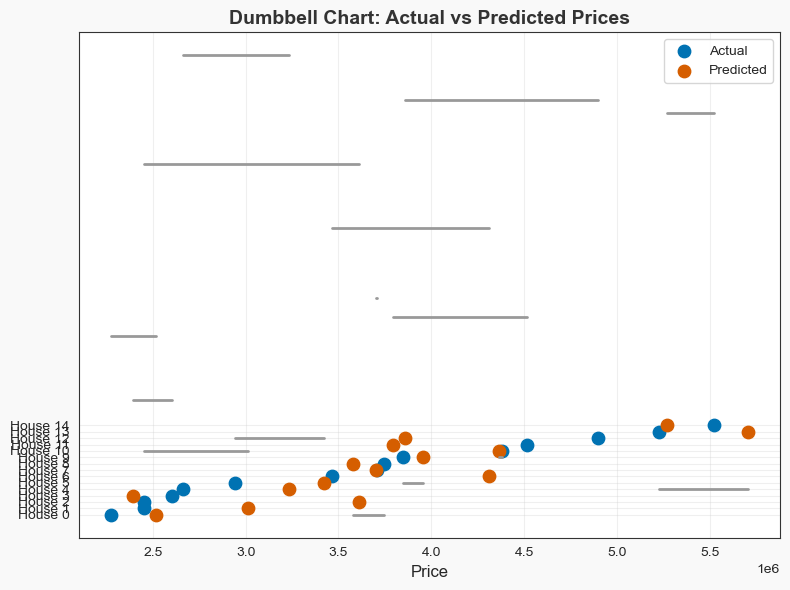

In [139]:
from matplotlib.lines import Line2D
sample_df = pred_df.sample(15, random_state=42).sort_values("Actual")
plt.figure(figsize=(8,6))
for i, row in sample_df.iterrows():
    plt.plot([row["Actual"], row["Predicted"]], [i, i], color="#999999", lw=2)
plt.scatter(sample_df["Actual"], range(len(sample_df)), color="#0072B2", label="Actual", s=80)
plt.scatter(sample_df["Predicted"], range(len(sample_df)), color="#D55E00", label="Predicted", s=80)
plt.title("Dumbbell Chart: Actual vs Predicted Prices", fontweight="bold", color="#333333")
plt.xlabel("Price")
plt.yticks(range(len(sample_df)), [f"House {i}" for i in range(len(sample_df))])
plt.legend()
plt.tight_layout()
plt.show()

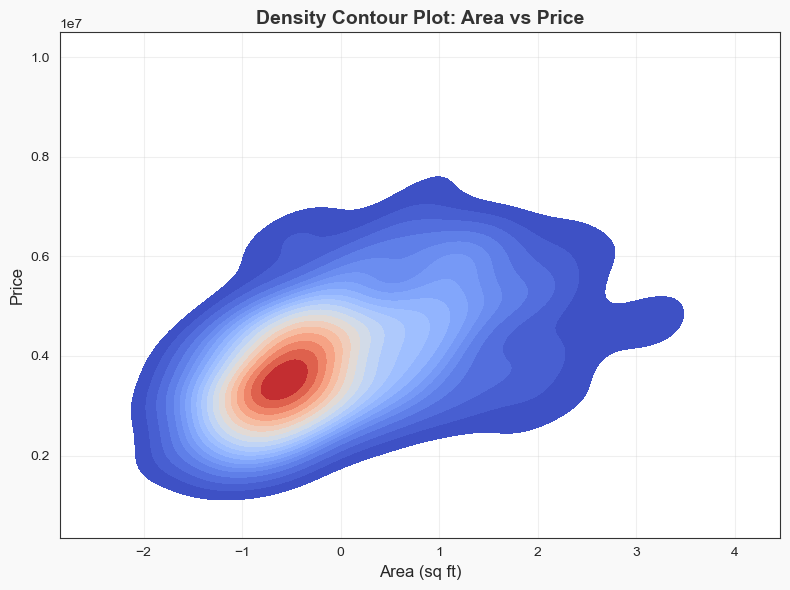

In [140]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['area'],
    y=df['price'],
    fill=True,
    cmap='coolwarm',
    thresh=0.05,
    levels=20
)
plt.title('Density Contour Plot: Area vs Price', fontweight='bold', color='#333333')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [141]:
print("\n📈 INTERPRETATION:")
print("- The R² score measures how much variance in house prices your model explains.")
print("- RMSE gives the average prediction error — the smaller, the better.")
print("- MAE represents the average absolute difference between predicted and actual values.")
print("- Residual plots help verify if errors are random (a good sign).")
print("\n✅ If residuals are roughly centered around zero with no strong pattern, your linear regression assumptions hold well.")


📈 INTERPRETATION:
- The R² score measures how much variance in house prices your model explains.
- RMSE gives the average prediction error — the smaller, the better.
- MAE represents the average absolute difference between predicted and actual values.
- Residual plots help verify if errors are random (a good sign).

✅ If residuals are roughly centered around zero with no strong pattern, your linear regression assumptions hold well.
